In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [20]:
df = pd.read_csv(r"C:\Users\vaishu\Desktop\IITH\assignments\PRML\Dataset\BTC-USD.csv")

# Extract specific columns
columns_to_extract = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']  # Replace with your column names
# Assuming 'df' has 'Close' and 'Volume' columns
df['Weighted_Price'] = df['Close'] * df['Volume']
vwap = df['Weighted_Price'].sum() / df['Volume'].sum()
print(f"Volume-Weighted Average Price (VWAP): {vwap}")

df['Date']=pd.to_datetime(df['Date']).dt.tz_localize(None)
# Resample to daily frequency
df_daily = df.resample('D', on='Date').mean()

# Resample to monthly frequency
df_monthly = df.resample('M', on='Date').mean()

# Resample to annual frequency
df_annual = df.resample('A-DEC', on='Date').mean()

# Resample to quarterly frequency
df_quarterly = df.resample('Q-DEC', on='Date').mean()

Volume-Weighted Average Price (VWAP): 27270.705897471114


0         457.334015
1         424.440002
2         394.795990
3         408.903992
4         398.821014
            ...     
2708    44575.203125
2709    43961.859375
2710    40538.011719
2711    40030.976563
2712    40126.429688
Name: Close, Length: 2713, dtype: float64


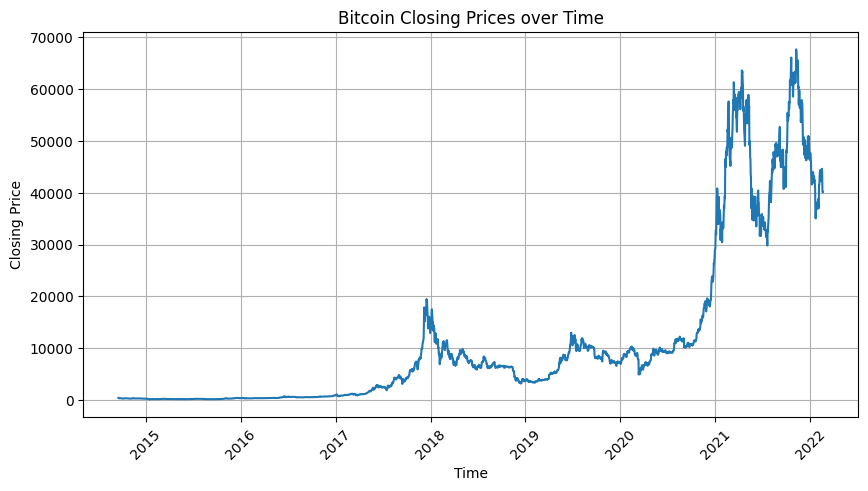

In [21]:

print(df['Close'])
# Convert Unix time to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set the Timestamp column as the index
df.set_index('Date', inplace=True)

# Plot 1: Line chart of Bitcoin closing prices over time
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'])
plt.title('Bitcoin Closing Prices over Time')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

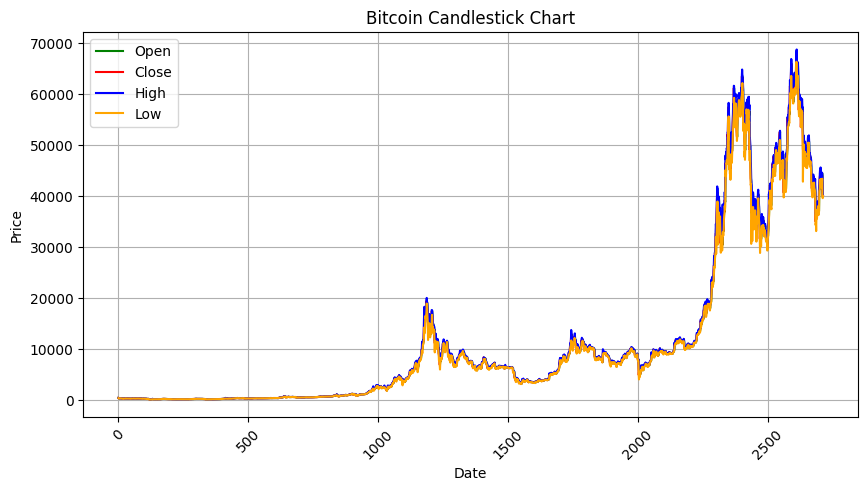

In [10]:
# Plot 2: Candlestick chart of Bitcoin prices
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Open'], color='green', label='Open')
plt.plot(df.index, df['Close'], color='red', label='Close')
plt.plot(df.index, df['High'], color='blue', label='High')
plt.plot(df.index, df['Low'], color='orange', label='Low')
plt.title('Bitcoin Candlestick Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

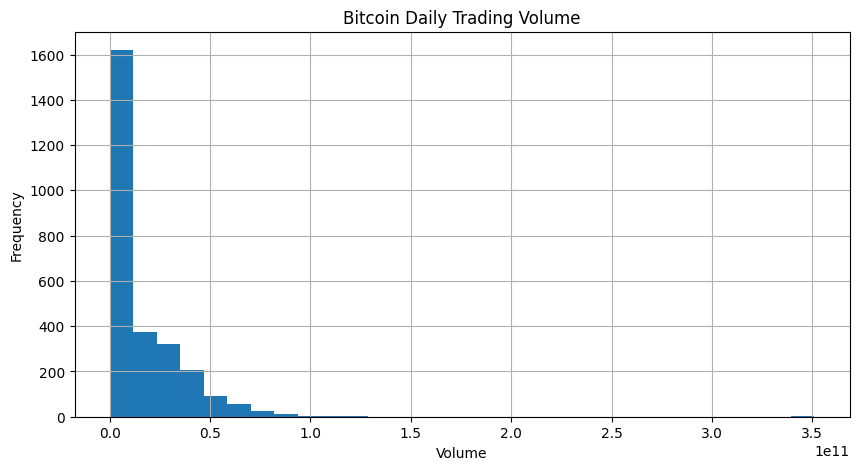

In [11]:
# Plot 3: Histogram of Bitcoin daily trading volume
plt.figure(figsize=(10, 5))
plt.hist(df['Volume'], bins=30)
plt.title('Bitcoin Daily Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

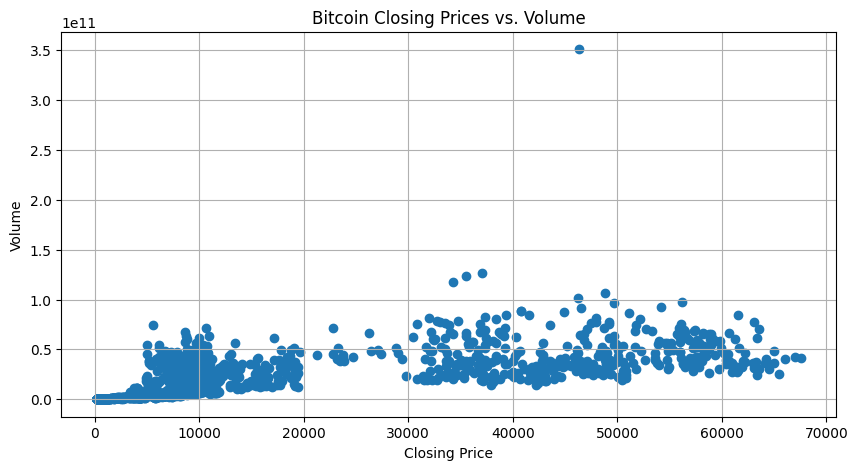

In [12]:
# Plot 4: Scatter plot of Bitcoin closing prices and volume
plt.figure(figsize=(10, 5))
plt.scatter(df['Close'], df['Volume'])
plt.title('Bitcoin Closing Prices vs. Volume')
plt.xlabel('Closing Price')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

<Figure size 1000x500 with 0 Axes>

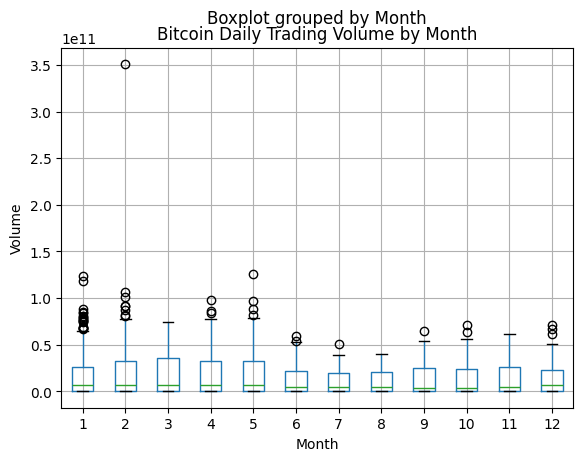

In [18]:
# Plot 5: Box plot of Bitcoin daily trading volume by month
# Plot 5: Box plot of Bitcoin daily trading volume by month
df['Month'] = df.index.month
plt.figure(figsize=(10, 5))
df.boxplot(column='Volume', by='Month')
plt.title('Bitcoin Daily Trading Volume by Month')
plt.xlabel('Month')
plt.ylabel('Volume')
plt.grid(True)
plt.show()